# 正态性检验方法
**正态性检验（Normality Test）**是统计学中用于判断数据是否服从正态分布（高斯分布）的重要方法。正态分布是许多统计模型（如t检验、ANOVA、线性回归等）的基础假设，因此验证数据的正态性至关重要。

# 图形法

## P-P图（Probability-Probability Plot）

### 基本概念
**P-P图（Probability-Probability Plot）**是一种通过比较两个概率分布的累积分布函数（CDF）来评估其相似性的图形工具。横轴表示理论分布的累积概率，纵轴表示样本数据的累积概率。
- **核心思想**
    - 若样本数据完全服从理论分布，所有点应落在对角线上。
    - 偏离对角线的方式揭示了分布差异的具体模式（如偏态、峰态等）。

### P-P图绘制步骤
- **计算样本的累积概率**：
    - 对样本数据$X = \{x_1, x_2, ..., x_n\}$，计算经验CDF： 
$$F_n(x) = \frac{1}{n} \sum_{i=1}^n I(x_i \leq x)$$

    - 对排序后的数据$x_{(1)} \leq x_{(2)} \leq ... \leq x_{(n)}$，计算分位点位置： 
$$p_i = F_n(x_{(i)}) = \frac{i}{n+1} \quad \text{(常用修正公式)}$$
- **计算理论分布的累积概率**：
    - 对理论分布$F$（如标准正态分布$\Phi$），计算： 
$$F(x_{(i)})$$
- **绘制散点图**：
    - 横轴：$F(x_{(i)})$（理论CDF）
    - 纵轴：$p_i$（样本CDF）
- **参考线**
    - **理想情况**：$y = x$（对角线）。
    - **实际应用**：若数据需拟合位置-尺度分布（如$\mathcal{N}(\mu, \sigma^2)$），可调整理论CDF为$F\left(\frac{x-\hat{\mu}}{\hat{\sigma}}\right)$。

### P-P图解读
- **完全匹配理论分布**：点大致落在一条直线上。
- **偏离直线的模式**：
    - **S型曲线**：数据分布比理论分布更厚尾或更薄尾。
    - **上凸或下凹曲线**：数据有偏态（右偏或左偏）。
    - **离散点偏离直线**：可能存在异常值。

### P-P图代码实现

#### `sm.ProbPlot()`
- 输入参数
   - `data`: 要进行检验的数据样本
   - `dist`: 指定检验的目标理论分布，默认 "norm"。
   - `distargs`: dist的额外参数（例如自由度、形状参数等）
   - `fit`: 是否拟合分布参数
- 方法
    - `.ppplot()`:绘制 P-P 图

#### `sm.ProbPlot()`代码实现

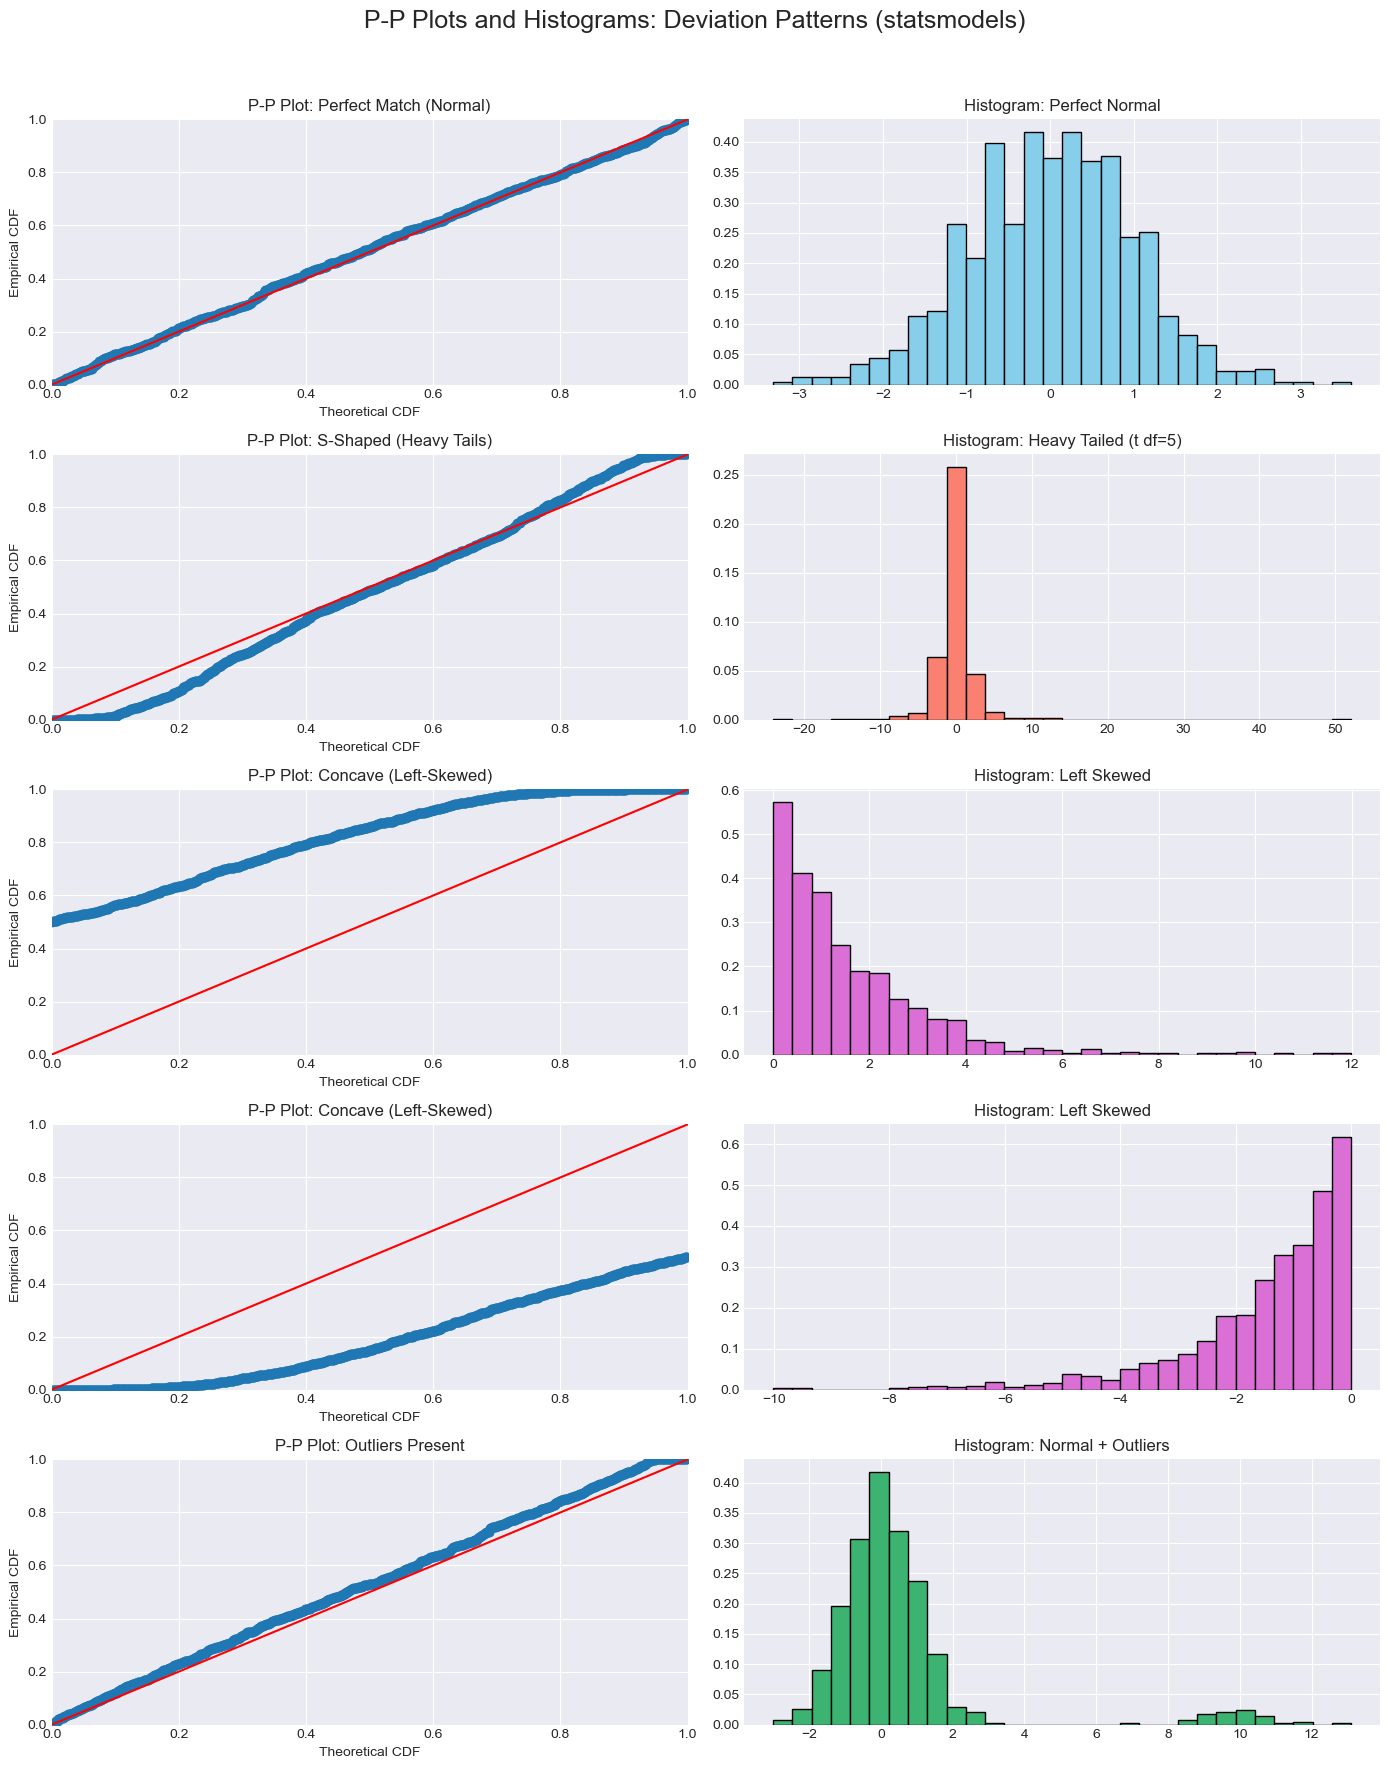

In [11]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 设置样式和画布
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
fig.suptitle("P-P Plots and Histograms: Deviation Patterns (statsmodels)", fontsize=18)

def draw_pp_plot(data, ax, title):
    """使用 statsmodels + scipy.stats 绘制 P-P 图"""
    pp = sm.ProbPlot(data, dist=stats.norm)
    pp.ppplot(line='45', ax=ax)
    ax.set_title(title)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel("Theoretical CDF")
    ax.set_ylabel("Empirical CDF")

# 1. 完全匹配：正态分布
data1 = np.random.normal(0, 1, 1000)
draw_pp_plot(data1, axes[0, 0], "P-P Plot: Perfect Match (Normal)")
axes[0, 1].hist(data1, bins=30, color='skyblue', edgecolor='black', density=True)
axes[0, 1].set_title("Histogram: Perfect Normal")

# 2. S型曲线：t分布（厚尾）
data2 = stats.t(df=2).rvs(size=1000)
draw_pp_plot(data2, axes[1, 0], "P-P Plot: S-Shaped (Heavy Tails)")
axes[1, 1].hist(data2, bins=30, color='salmon', edgecolor='black', density=True)
axes[1, 1].set_title("Histogram: Heavy Tailed (t df=5)")

# 3. 上凸曲线：右偏分布（指数）
data3 = stats.expon(scale=1.5).rvs(size=1000)
draw_pp_plot(data3, axes[2, 0], "P-P Plot: Concave (Left-Skewed)")
axes[2, 1].hist(data3, bins=30, color='orchid', edgecolor='black', density=True)
axes[2, 1].set_title("Histogram: Left Skewed")

# 4. 下凹曲线：左偏分布（负指数）
data4 = -stats.expon(scale=1.5).rvs(size=1000)
draw_pp_plot(data4, axes[3, 0], "P-P Plot: Concave (Left-Skewed)")
axes[3, 1].hist(data4, bins=30, color='orchid', edgecolor='black', density=True)
axes[3, 1].set_title("Histogram: Left Skewed")

# 5. 离群点偏离：正态 + 异常值
data5 = np.random.normal(0, 1, 1000)
data5[:50] += 10  # 添加异常值
draw_pp_plot(data5, axes[4, 0], "P-P Plot: Outliers Present")
axes[4, 1].hist(data5, bins=30, color='mediumseagreen', edgecolor='black', density=True)
axes[4, 1].set_title("Histogram: Normal + Outliers")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 解读

#### 完美匹配正态分布（Perfect Match - Normal）
- **P-P图特征**： 
    - 数据点紧密贴合图中的对角线（理论正态分布线）。
    - 曲线平滑无偏离，呈直线状。
- **直方图特征**： 
    - 对称的钟形分布，两侧尾部平缓。
- **解读**： 
    - 数据完全符合正态分布，适合使用参数检验（如t检验、ANOVA）。

#### 重尾分布（S-Shaped - Heavy Tails）
- **P-P图特征**： 
    - 曲线呈S形，两端（尾部）偏离对角线，中间部分贴合。

- **直方图特征**： 
尾部比正态分布更厚（如t分布，自由度df=5）。
- **解读**： 
    - 数据极端值较多，尾部概率高于正态分布。
    - 可能导致参数检验高估显著性，建议改用稳健统计方法或非参数检验。

#### 右偏分布（Concave - Right-Skewed）
- **P-P图特征**： 
    - 曲线呈上凸（Convex）形态，左侧尾部偏离对角线向上。
- **直方图特征**： 
    - 右侧有长尾，峰值左移。
- **解读**： 
    - 数据分布向右倾斜，均值大于中位数。
    - 处理方式同左偏分布。

#### 左偏分布（Concave - Left-Skewed）
- **P-P图特征**： 
    - 曲线呈下凸（Concave）形态，右侧尾部偏离对角线向下，左侧贴合。
- **直方图特征**： 
    - 左侧有长尾，峰值右移。
- **解读**： 
    - 数据分布向左倾斜，均值小于中位数。
    - 需进行数据转换（如对数变换）或使用非参数检验（如Wilcoxon检验）。

#### 正态分布+异常值（Normal + Outliers）
- **P-P图特征**：
    - 主体部分贴合对角线，但尾部轻微偏离。
- **直方图特征**： 
    - 主体钟形，两侧有少量突出值。
- **解读**： 
    - 数据主体符合正态分布，但受异常值干扰。
    - 可尝试剔除异常值或使用稳健统计量（如中位数）。

## P-P图与Q-Q图总结

| **对比维度**       | **PP图（Probability-Probability Plot）**                          | **QQ图（Quantile-Quantile Plot）**                          |
|--------------------|------------------------------------------------------------------|------------------------------------------------------------|
| **核心思想**       | 比较样本累积概率与理论分布累积概率的一致性。                     | 比较样本分位数与理论分布分位数的匹配程度。                 |
| **横轴（X轴）**    | 理论分布的累积概率（P(X ≤ x)）。                                | 理论分布的分位数（如标准正态分布的分位数）。               |
| **纵轴（Y轴）**    | 样本数据的累积概率（经验分布函数值）。                          | 样本数据的分位数（排序后的样本值）。                       |
| **适用场景**       | 更关注分布整体概率的匹配，尤其是尾部概率的差异。                | 更关注分位数的匹配，尤其是分布形状、偏态和尾部的偏离。     |
| **敏感度**         | 对概率密度的中间区域（如中位数附近）更敏感。                    | 对分布的尾部（极端值）和形状（如偏度、峰度）更敏感。       |
| **典型用途**       | 检验分布的整体拟合优度，尤其是概率比例的一致性。                | 检验分布的形状是否匹配（如正态性检验）。                   |
| **图形解读**       | 若数据点接近对角线（Y=X），则拟合良好；偏离表示概率分布不一致。 | 若数据点接近对角线，则分布匹配；尾部偏离暗示尾部差异。     |
| **优势**           | 直观展示概率差异，适合比较不同分布的累积概率。                  | 更易识别分布的偏态、厚尾或薄尾等特征。                     |
| **局限性**         | 对尾部差异的敏感性较低，可能掩盖极端值问题。                    | 对样本量敏感，小样本时可能波动较大。                       |
| **常见分布检验**   | 适用于任何连续分布的概率比较。                                  | 常用于正态分布、指数分布等常见分布的检验。                 |

1. **QQ图更常用**：因分位数对比能直观反映分布形状，尤其在正态性检验中广泛使用。
2. **PP图的特殊用途**：在需要严格验证概率比例时（如金融风险模型中的尾部概率）可能更合适。
3. **建议**：若关注整体分布匹配，优先使用QQ图；若需验证概率一致性，可结合PP图分析。